# Hospital Mortality Prediction using ML and PyCaret

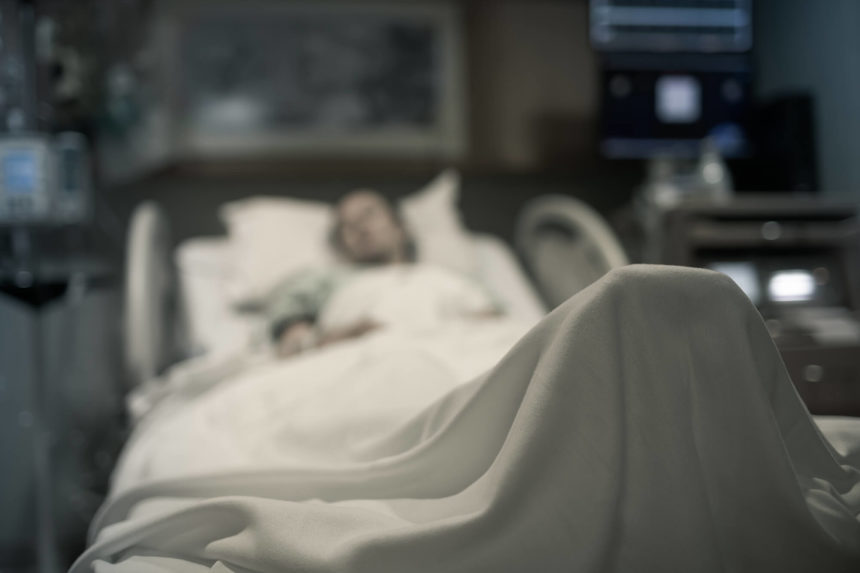


For HF patients hospitalised to intensive care units (ICU), the predictors of in-hospital mortality are still poorly understood. Among HF patients admitted to the ICU, my goal was to create and verify a prediction model for all-cause hospital mortality.

To forecast the outcomes in this notebook, we will first use several ML models and subsequently PyCaret Auto ML Library.

**Time Line of the Project:**

- Data Analysis
- Data Preprocessing
- Model Building and Prediction using ML models
- Model Building and Prediction using PyCaret

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("mortality.csv")

In [3]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


## Data Analysis

In [4]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [5]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [6]:
df.shape

(1177, 51)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

### Handling NAN Values

**Float variables:**

In [8]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [9]:
float_col = df.select_dtypes(include='float64').columns

In [10]:
si.fit(df[float_col])

SimpleImputer()

In [11]:
df[float_col] = si.transform(df[float_col])

In [12]:
x = df.drop(columns='outcome')

y = df[['outcome']]

**Dependant Variables:**

In [13]:
SI =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [14]:
SI.fit_transform(y)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')

In [16]:
df_final = x.copy()

df_final['outcome'] = y

In [17]:
df_final.isnull().sum()

group                       0
ID                          0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR       

### Visualising the Dependent Variable

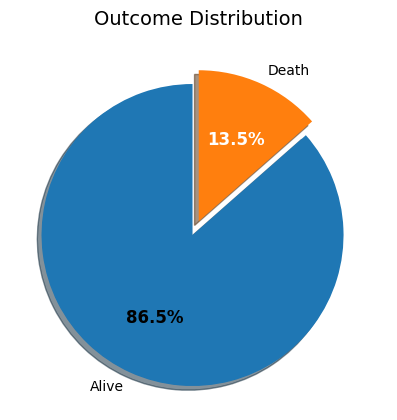

In [18]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

In [19]:
import plotly.express as px
fig = px.histogram(df, x="age", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [20]:
fig = px.histogram(df, x="BMI", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [21]:
fig = px.histogram(df, x="SP O2", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [22]:
fig = px.histogram(df, x="heart rate", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [23]:
df_final['gendera'].value_counts()

2    618
1    559
Name: gendera, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



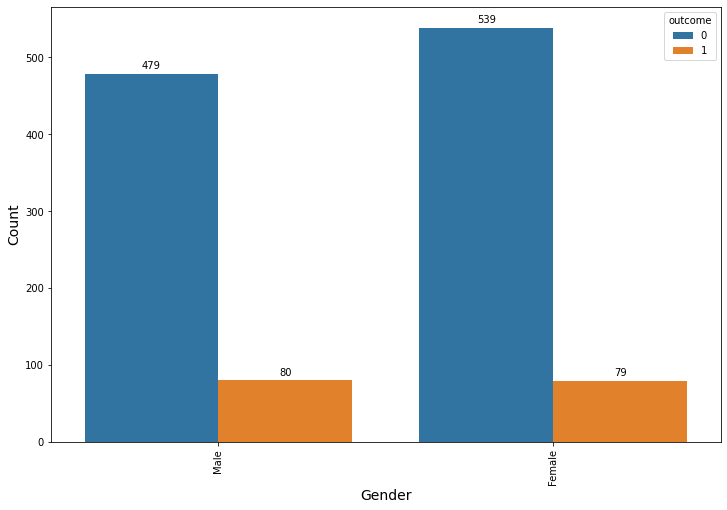

In [24]:
plt.figure(figsize=(12,8))
plot = sns.countplot(df_final['gendera'], hue=df_final['outcome'])
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(np.arange(2), ['Male', 'Female'], rotation='vertical')

for i in plot.patches:
  plot.annotate(format(i.get_height()),
                (i.get_x() + i.get_width()/2,
                 i.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords='offset points') 

plt.show()

### Correlation

In [25]:
col = ['group', 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [26]:
corr = df_final[col].corr()

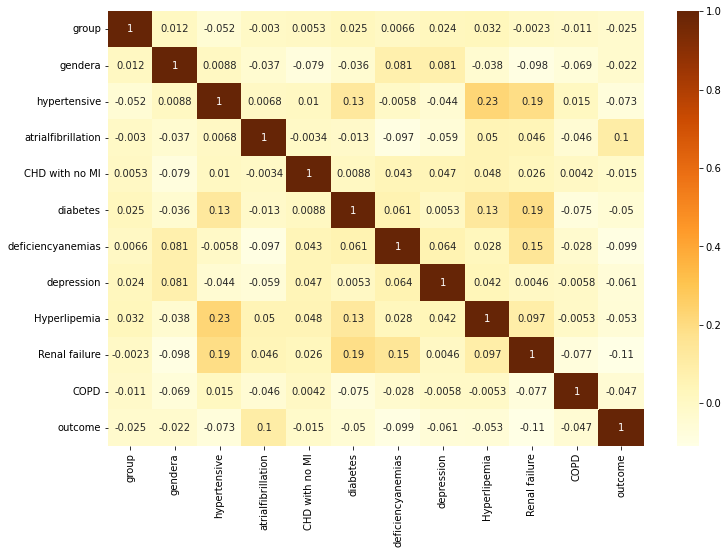

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlOrBr')

#### Distribution of Continuous Variables

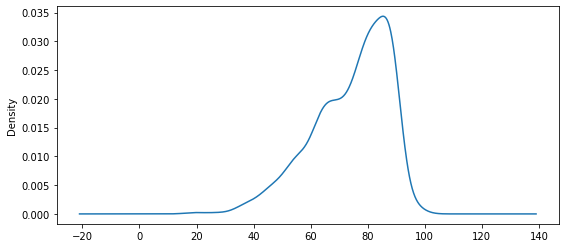

In [28]:
plt.figure(figsize=(9,4))
df_final['age'].plot(kind='kde')

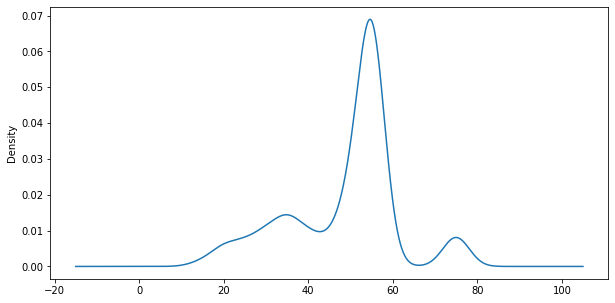

In [29]:
plt.figure(figsize=(10,5))
df_final['EF'].plot(kind='kde')

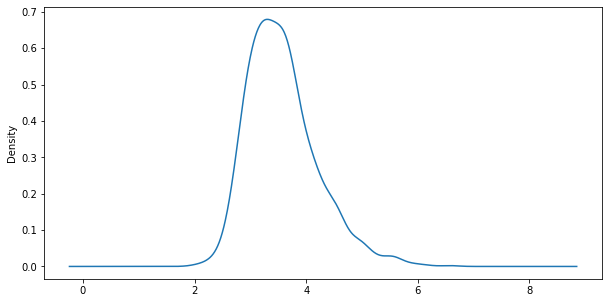

In [30]:
plt.figure(figsize=(10,5))
df_final['RBC'].plot(kind='kde')

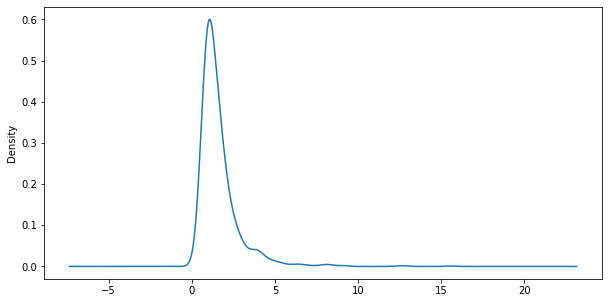

In [31]:
plt.figure(figsize=(10,5))
df_final['Creatinine'].plot(kind='kde')

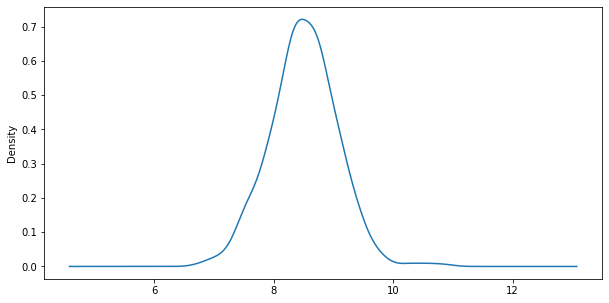

In [32]:
plt.figure(figsize=(10,5))
df_final['Blood calcium'].plot(kind='kde')

In [33]:
df_final.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.588179,0,0,0,1,1,...,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,0
1,1,139812,75,2,30.188278,0,0,0,0,1,...,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,0
2,1,109787,83,2,26.572634,0,0,0,0,1,...,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,0
3,1,130587,43,2,83.264629,0,0,0,0,0,...,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0
4,1,138290,75,2,31.824842,1,0,0,0,1,...,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,0


## Data Preprocessing

### Splitting the ata

In [34]:
X = df_final.drop(columns='outcome')
y = df_final[['outcome']]

### Standardising the Data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale = StandardScaler()

In [37]:
scaled = scale.fit_transform(X)

In [38]:
final_X = pd.DataFrame(scaled, columns= X.columns)

In [39]:
final_X.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.653197,-0.886597,-0.153051,-1.051449,8.781267e-01,-1.595362,-0.906632,-0.306376,1.171744,1.396379,...,-0.033742,-1.814098,1.289532,-0.286026,1.980755,-2.545867,-1.112245,-1.533672,-0.503052,0.488583
1,-0.653197,-0.377851,0.070357,0.951068,8.431822e-16,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,...,-0.000272,-0.591830,-0.719329,-0.935527,-0.925400,-2.631567,1.264720,-1.533672,2.950362,0.488583
2,-0.653197,-1.412399,0.666111,0.951068,-4.290589e-01,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,...,0.439627,-0.409649,0.669477,-1.480271,0.147056,-1.894540,0.708507,-1.533672,2.359646,-1.066269
3,-0.653197,-0.695710,-2.312661,0.951068,6.298430e+00,-1.595362,-0.906632,-0.306376,-0.853429,-0.716138,...,-0.093989,1.707012,-1.913344,-0.591321,-0.705227,-0.146241,2.257299,-1.420354,2.677724,0.488583
4,-0.653197,-0.430293,0.070357,0.951068,1.942067e-01,0.626817,-0.906632,-0.306376,-0.853429,1.396379,...,-0.535801,0.406521,0.415209,0.468234,-1.870013,-2.203063,-0.950913,-1.420354,0.405741,0.488583


In [40]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [42]:
print(X_train.shape, X_test.shape)

(823, 50) (354, 50)


In [43]:
X_train.drop(columns = 'ID', inplace=True)
X_test.drop(columns='ID', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
X_train.head()

,group,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1011,2,83,2,21.127530,1,0,0,0,0,0,...,135.666667,7.237500,105.888889,14.111111,1.837500,7.261667,19.666667,2.025000,44.000000,55
431,1,50,1,38.810503,0,0,0,1,0,0,...,141.500000,8.750000,104.000000,11.636364,2.030000,7.325556,30.363636,1.875000,55.333333,40
102,1,72,2,36.088782,1,1,0,1,1,0,...,143.444444,8.862500,109.444444,14.333333,1.862500,7.405000,23.666667,1.050000,40.000000,55
308,1,68,1,32.296449,1,0,0,1,1,0,...,135.928571,8.163636,100.642857,11.857143,2.007692,7.400000,27.357143,1.533333,47.500000,55
548,1,91,2,30.188278,0,0,0,0,0,0,...,142.470588,8.294118,109.117647,15.647059,2.394118,7.426667,21.647059,2.400000,32.928571,20


## Model Development using ML

### XGBoost

In [45]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [46]:
xgb = XGBClassifier(random_state=42)

In [47]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier(random_state=42)

In [48]:
pred = xgb.predict(X_test)

In [49]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [51]:
cf = confusion_matrix(y_test, pred)

In [52]:
cf

array([[295,   6],
       [ 40,  13]])

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       301
           1       0.68      0.25      0.36        53

    accuracy                           0.87       354
   macro avg       0.78      0.61      0.64       354
weighted avg       0.85      0.87      0.84       354



### Comparing Values

In [54]:
combine = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [55]:
combine_result = pd.DataFrame(combine,  columns=['y_test', 'y_pred'])

In [56]:
combine_result

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
349,1,1
350,0,0
351,0,0
352,0,0


#### Plotting ROC and Accuracy Curve

In [57]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

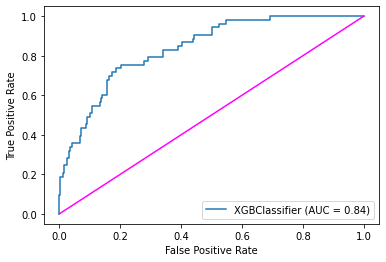

In [58]:
plot_roc_curve(xgb, X_test, y_test)
plt.plot([0,1], [0,1], color='magenta', ls='-')

# Using AutoML

## PyCaret

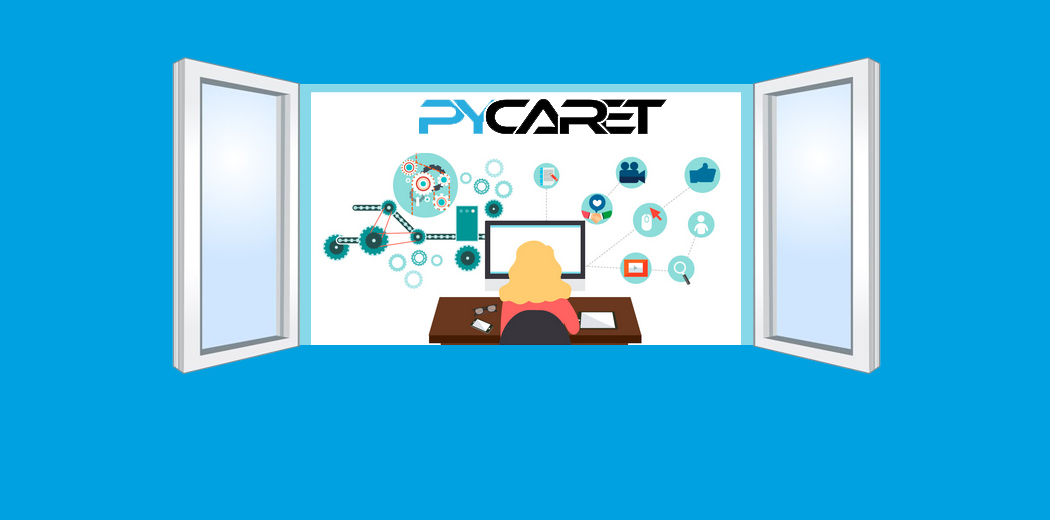

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing Pycaret

In [78]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [79]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [86]:
df2 = pd.read_csv("mortality.csv")

In [87]:
from pycaret.classification import *

In [88]:
df2.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [89]:
model = setup(data = df2, target= 'outcome')

,Description,Value
0,session_id,5102
1,Target,outcome
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1177, 51)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [90]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8797,0.0000,0.2159,0.8081,0.3206,0.2798,0.3574,0.019
ada,Ada Boost Classifier,0.8797,0.7849,0.4076,0.6207,0.4872,0.4221,0.4369,0.218
gbc,Gradient Boosting Classifier,0.8797,0.7726,0.2773,0.6517,0.3831,0.3306,0.3694,0.653
lda,Linear Discriminant Analysis,0.8785,0.7878,0.3288,0.6571,0.4202,0.3624,0.3965,0.026
rf,Random Forest Classifier,0.8773,0.7928,0.1561,0.8583,0.2568,0.2240,0.3241,0.643
et,Extra Trees Classifier,0.8736,0.8101,0.1045,0.8000,0.1828,0.1607,0.2625,0.525
lightgbm,Light Gradient Boosting Machine,0.8712,0.7697,0.2273,0.6067,0.3232,0.2702,0.3123,0.379
lr,Logistic Regression,0.8700,0.7636,0.2068,0.5460,0.2940,0.2449,0.2825,0.685
dummy,Dummy Classifier,0.8603,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.013
knn,K Neighbors Classifier,0.8517,0.5154,0.0174,0.1333,0.0297,0.0070,0.0122,0.122


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5102,
                solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5102,
                solver='auto', tol=0.001)

In [91]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9036,0.8815,0.4167,0.8333,0.5556,0.5081,0.5467
1,0.8675,0.8474,0.1667,0.6667,0.2667,0.2217,0.2875
2,0.9036,0.7805,0.4167,0.8333,0.5556,0.5081,0.5467
3,0.8780,0.7746,0.2727,0.6000,0.3750,0.3178,0.3483
4,0.8780,0.7631,0.1818,0.6667,0.2857,0.2421,0.3045
5,0.8902,0.7644,0.3636,0.6667,0.4706,0.4152,0.4390
6,0.8902,0.6671,0.3636,0.6667,0.4706,0.4152,0.4390
7,0.8537,0.7209,0.0909,0.3333,0.1429,0.0906,0.1139
8,0.8537,0.7048,0.2500,0.5000,0.3333,0.2613,0.2811


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5102, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [92]:
X = df_final.drop(columns='outcome')
y = df_final[['outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [93]:
pred = predict_model(gbc, data = X_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5102, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadin

In [94]:
pred

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Label,Score
774,1,135043,88,2,22.819490,1,1,0,1,0,...,101.333333,15.777778,2.162500,7.378532,30.000000,1.853426,45.535382,75,0.0,0.9749
1048,2,102028,54,2,21.349905,1,0,1,1,1,...,97.461538,15.384615,2.018182,7.380000,23.769231,2.450000,35.000000,55,0.0,0.9585
72,1,103673,82,1,21.114758,1,0,0,0,0,...,104.200000,11.700000,2.140000,7.423333,33.200000,0.980000,47.333333,35,0.0,0.9822
319,1,163520,51,2,42.125279,1,0,0,1,0,...,107.000000,11.200000,1.812500,7.348333,25.300000,1.583333,47.666667,75,0.0,0.9796
1085,2,132082,75,1,25.777517,1,1,0,1,0,...,103.642857,16.500000,2.166667,7.310000,20.666667,3.350000,45.535382,30,0.0,0.9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,157104,55,1,22.693601,1,0,0,1,1,...,99.375000,21.937500,2.228571,7.313333,18.470588,1.605263,36.411765,20,1.0,0.8080
1102,2,113423,72,1,27.409055,1,0,0,1,0,...,102.800000,12.777778,2.028571,7.378532,27.700000,1.853426,45.535382,55,0.0,0.9864
388,1,167883,53,2,21.136760,1,0,0,1,1,...,106.043478,20.739130,2.390000,7.315714,20.260870,1.711111,37.384615,20,0.0,0.8536
367,1,154406,66,2,39.560422,0,0,0,0,0,...,99.000000,13.600000,2.280000,7.440000,31.600000,1.700000,50.000000,55,0.0,0.9888
